In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
path = 'https://www.who.int/healthinfo/statistics/'
P1 = path + 'Morticd10_part1.zip?ua=1'
P2 = path + 'Morticd10_part2.zip?ua=1'
P_pop = path + 'Pop.zip?ua=1'

In [36]:
P1 = pd.read_csv(P1)
P2 = pd.read_csv(P2)
P_pop=pd.read_csv(P_pop)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 2: invalid start byte

In [ ]:
P = P1.append(P2)

### 1. What was the population and the total number of deaths (from all causes, all ages) in 2010 for:
o Iceland
o Italy
o New Zealand

In [120]:
P_pop_2010=P_pop[P_pop.Year==2010]

In [40]:
P_2010 = P[P.Year==2010]

In [99]:
P_pop_2010_Iceland=P_pop_2010[P_pop_2010.Country==4160]
sum(P_pop_2010_Iceland.Pop1)

318041.0

In [41]:
P_2010_Iceland=P_2010.loc[P_2010['Country']==(4160)]
sum(P_2010_Iceland.Deaths1)

4038

In [42]:
P_2010_Italy=P_2010.loc[P_2010['Country']==(4180)]
sum(P_2010_Italy.Deaths1)

1169230

In [100]:
P_pop_2010_I=P_pop_2010[P_pop_2010.Country==4018]
sum(P_pop_2010_I.Pop1)

9490583.0

In [101]:
P_pop_2010_NewZealand=P_pop_2010[P_pop_2010.Country==5150]
sum(P_pop_2010_NewZealand.Pop1)

4367360.0

In [43]:
P_2010_NewZealand=P_2010.loc[P_2010['Country']==(5150)]
sum(P_2010_NewZealand.Deaths1)

57298

1.The total number of population and deaths (from all causes, all ages) in 2010 for Iceland, Italy and New Zealand

Results showed that the total population for Iceland was 318041 and the number of deaths from all causes and ages was 4038. For Italy, there was 9490583 population in 2010 and 1169230 deaths from all causes and ages. In New Zealand, the total population was 4367360, and there were 57298 deaths from all causes and ages in 2010. The total population in these three countries were significantly different. It was hard to further interpret their all causes and ages deaths and health status of populations across these countries. 


### 2. What was the distribution of deaths (all causes, all years) by age group in Italy? 
o Visualise the results using a histogram.

In [115]:
P_I=pd.DataFrame(np.sum(P_2010_Italy))

P_I=P_I.drop(['Country','Admin1','SubDiv','Year','List','Cause','Sex','Frmat','IM_Frmat','Deaths1','IM_Deaths1','IM_Deaths2','IM_Deaths3','IM_Deaths4'],axis=0,inplace=False)

In [119]:
P_I.columns=['number']
P_I.shape

(25, 1)

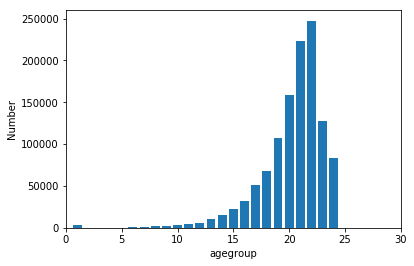

In [118]:
y=P_I.number.values
x=range(1,26)
plt.bar(x,y)
plt.xlabel("agegroup")
plt.ylabel("Number")

min_x = P_I['number'].quantile(.01)
max_x = P_I['number'].quantile(.99)
plt.xlim(0, 30)

plt.title("")
plt.show()

2. The distribution of deaths (all causes, all years) by age group in Italy

As shown in the above histogram, the number of deaths (all causes and ages) was highest in ‘”85-90” age group. The distribution of deaths (all causes, all years) by age group in Italy was skewed.


### 3. What were the top five causes of death (top five ICD-10 terms) in Italy across all years for the Neoplasm ICD10-category (C00-D48)?

In [153]:
P_2010_Italy_Neoplasm = P_2010_Italy[(P_2010_Italy.Cause.str.startswith('C0'))]

In [154]:
P_2010_Italy_Neoplasm = pd.DataFrame(P_2010_Italy_Neoplasm.groupby(P_2010_Italy_Neoplasm.Cause).apply(lambda subf: subf['Deaths1'].sum()))
P_2010_Italy_Neoplasm.columns = ['Death_I']
P_2010_Italy_Neoplasm.reset_index(inplace=True)

In [155]:
sorted_ = P_2010_Italy_Neoplasm.sort_values('Death_I', axis=0, ascending=False)
sorted_top5 = sorted_.head(5)
sorted_top5

,Cause,Death_I
23,C069,492
9,C029,455
24,C07,243
30,C099,202
4,C01,95


3. 1 The top five causes of death in Italy across all years for the Neoplasm ICD10-category (C00-D48)

Cause column was used to identify the number of deaths in Italy across all years for the Neoplasm ICD10-category (C00-D48), which named by ‘Neoplasm cases’ in the database. The top five causes included “C069”, “C029”, “C07”, “C099” and “C01”.


### Generate a table with the cause of death, the number of deaths, and the proportion of overall deaths.

In [156]:
P_2010_Italy_Neoplasm['proportion_of_overall']=P_2010_Italy_Neoplasm['Death_I']/sum(P_2010_Italy_Neoplasm.Death_I)
P_2010_Italy_Neoplasm
sorted_I = P_2010_Italy_Neoplasm.sort_values('Death_I', axis=0, ascending=False)

### Generate a pie chart to visualize the proportion of deaths.

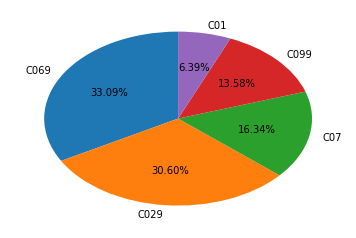

In [157]:
labels = np.array(sorted_top5.Cause)
slices = np.array(sorted_top5.Death_I)

plt.pie(slices, labels = labels, startangle=90, autopct = '%1.2f%%')
plt.show()

3. Table and Pie chart with the cause of death, the number of deaths, and the proportion of overall deaths.

As shown in table and Pie chart. Among all the causes of deaths in Italy across all years for the Neoplasm ICD10-category (C00-D48), the most common causes were “C069” and “C029”, which were 33.9% and 30.6%, respectively. Following that, the third top causes of deaths was “C07”, which accounted for 16.3%. And the other two top causes of deaths were “C099” and “C01”, which were 13.6% and 6.4%, respectively. 


### 4. Are there differences by age group for deaths from Neoplasms (C00-D48) in Australia for 2010?
o Identify the top five age groups in Australia dying with a Neoplasms cause of death.

In [158]:
P_2010_Australia=P_2010.loc[P_2010.Country==5020]

In [159]:
P_2010_A=P_2010_Australia[(P_2010_Australia.Cause.str.startswith('C0'))]

In [160]:
P_2010_A_age=pd.DataFrame(np.sum(P_2010_A))

In [161]:
P_2010_A_age=P_2010_A_age.drop(['Country','Admin1','SubDiv','Year','List','Cause','Sex','Frmat','IM_Frmat','Deaths1','IM_Deaths1','IM_Deaths2','IM_Deaths3','IM_Deaths4'],axis=0,inplace=False)

In [162]:
P_2010_A_age.columns=['number']
sorted_A_top5=P_2010_A_age.sort_values('number', axis=0, ascending=False)
sorted_A_top5.head(5)

,number
Deaths21,63
Deaths19,63
Deaths18,62
Deaths22,60
Deaths20,58


4. The top five age groups in Australia dying with a Neoplasms cause of death for 2010

In 2010, The top five age groups in Australia dying with a Neoplasms cause of death varied between 60 and 84 years old. After grouping five-years age groups, results showed that the top five age groups included the “75-79 years old” (63 deaths), “65-69 years old” (63 deaths), “60-64 years old” (62 deaths), “80-84 years old” (60 deaths) and “70-74 years old” (58 deaths).


### 5. Compare and contrast the frequency of deaths by Neoplasms in Italy and Australia in 2010.

In [163]:
Italy=np.sum(P_pop_2010_I.Pop1)
Australia=np.sum(P_pop_2010_A.Pop1)

In [164]:
P_2010_Italy_Neoplasm['proportion_I']= P_2010_Italy_Neoplasm['Death_I']/P_I

In [166]:
P_2010_A['proportion_A']= P_2010_A['Deaths1']/P_A

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
merged = pd.merge(P_2010_Italy_Neoplasm, P_2010_A [['Cause', 'proportion_A']], left_on='Cause' , right_on='Cause')

Text(0,0.5,'Number')

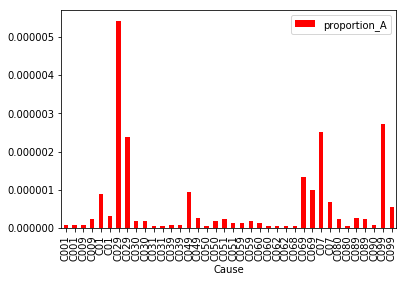

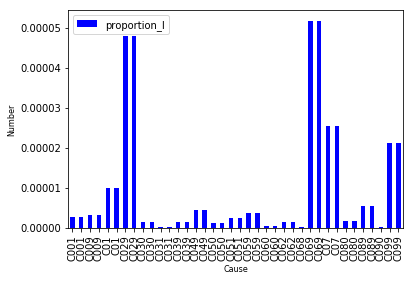

In [168]:
%matplotlib inline

ax=merged[['Cause','proportion_A']].plot(kind='bar', x='Cause', y='proportion_A',color='r',figsize=(6,4),legend=True, fontsize=10)
ax=merged[['Cause','proportion_I']].plot(kind='bar', x='Cause', y='proportion_I', color='b',figsize=(6,4),legend=True, fontsize=10)
ax2=ax
ax.set_xlabel("Cause",fontsize=8)

ax.set_ylabel("Number",fontsize=8)

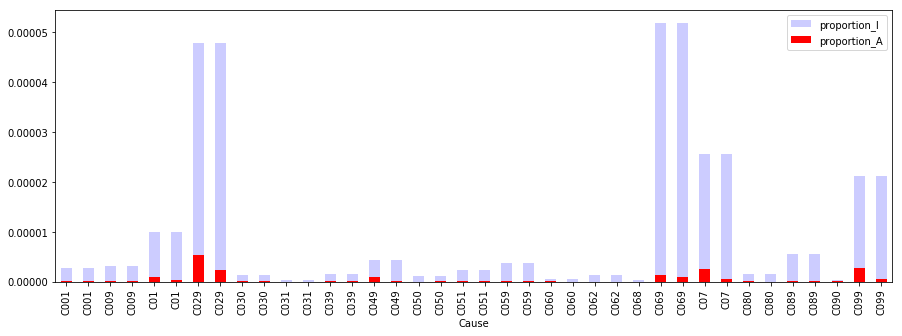

In [169]:
ax = merged.plot.bar(x='Cause', y = 'proportion_I', color='b',alpha=0.2,figsize=(15, 5))
merged.plot.bar(x='Cause', y = 'proportion_A' ,color='r',alpha=1, ax=ax)


In [170]:
sum(merged.proportion_I),sum(merged.proportion_A)

(0.0003748979383036849, 2.219978324938901e-05)

In [171]:
max(merged.proportion_I),max(merged.proportion_A)

(5.1840861620408354e-05, 5.426613683183978e-06)

In [172]:
min(merged.proportion_I),min(merged.proportion_A)

(3.1610281475858754e-07, 4.484804696846263e-08)

In [173]:
np.mean(merged.proportion_I),np.mean(merged.proportion_A)

(9.865735218518024e-06, 5.842048223523424e-07)

In [174]:
np.std(merged.proportion_I), np.std(merged.proportion_A)

(1.5297784657895665e-05, 1.0491843601362786e-06)

In [175]:
np.median(merged.proportion_I), np.median(merged.proportion_A)

(2.844925332827288e-06, 1.7939218787385053e-07)

5. Comparison of the frequency of deaths by Neoplasms in Italy and Australia in 2010.
Firstly, we combine information on the population and deaths by Neoplasms in Italy and Australia in 2010. Considering the deferent population between Italy and Australia, we can’t compare the difference of deaths by Neoplasms directly by using the amount of deaths by Neoplasms. So, we used the frequency of Neoplasm related deaths to compare the difference between Italy and Australia in 2010. Firstly, finding out the number of deaths by Neoplasms in both Italy and Australia in 2010. Following that, these two figures were divided by their corresponded total population number in 2010. Then, the frequency of deaths by Neoplasms in Italy and Australia in 2010 were calculated separately. As shown in the bar chart, we can find that the frequency of deaths by Neoplasms in Australia for each cause was obviously lower than these frequencies in Italy. Compared with other causes, the frequency of “C029”, “C069”, “C07” and “C099” caused deaths were high in both Italy and Australia in 2010. Totally in 2010, the frequency of deaths by Neoplasms in Italy were higher than that in Australia across all causes. The more severe ageing situation in Italy might contribute the higher frequency of deaths by Neoplasms compared with Australia. 
